The goal of this notebook is to start talking about feature selection for models where the features and the target are both numerical.

The original dataset can be found here: https://www.kaggle.com/datasets/paakhim10/taylor-swift-the-myth-the-legend?select=taylorswift-Features.csv

In [75]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

df = pd.read_csv("taylorswift-Features.csv")

df.head()

,Unnamed: 0,album_id,album_name,id,track_name,danceability,swiftiness,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,100,0.610,7,-4.840,1,0.0327,0.009420,0.000037,0.3670,0.685,116.998
1,1,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,100,0.733,0,-5.376,1,0.0670,0.088500,0.000000,0.1680,0.701,96.057
2,2,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,100,0.822,11,-4.785,0,0.0397,0.000421,0.019700,0.0899,0.305,94.868
3,3,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,100,0.885,0,-5.968,1,0.0447,0.000537,0.000056,0.3850,0.206,92.021
4,4,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,100,0.721,0,-5.579,1,0.0317,0.000656,0.000000,0.1310,0.520,96.997


In [76]:
# lets delete some columns we won't care about
df = df.drop(["Unnamed: 0", "album_id", "album_name", "id", "track_name"], axis=1)

df.head()

,danceability,swiftiness,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.757,100,0.610,7,-4.840,1,0.0327,0.009420,0.000037,0.3670,0.685,116.998
1,0.733,100,0.733,0,-5.376,1,0.0670,0.088500,0.000000,0.1680,0.701,96.057
2,0.511,100,0.822,11,-4.785,0,0.0397,0.000421,0.019700,0.0899,0.305,94.868
3,0.545,100,0.885,0,-5.968,1,0.0447,0.000537,0.000056,0.3850,0.206,92.021
4,0.588,100,0.721,0,-5.579,1,0.0317,0.000656,0.000000,0.1310,0.520,96.997


In [77]:
df.shape

(246, 12)

Next we clean the data. We need to do the following:

- check for missing values and handle them
- encode any categorical data. There are technically some categories (mode, key), but they are already encoded! So we're good there
- remove outliers- lets assume we want to keep all the data points since we dont have a ton
- split the data into training and testing
- scale the features

In [78]:
# check for missing data
df.isna().sum()

danceability        0
swiftiness          0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

No missing data! So we can move forward with splitting our data into a training and testing set.

In [79]:
# split the target from the features

yDF = pd.DataFrame(df["danceability"])

yDF.head()

,danceability
0,0.757
1,0.733
2,0.511
3,0.545
4,0.588


In [80]:
xDF = df.drop(columns="danceability")

xDF.head()

,swiftiness,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,100,0.610,7,-4.840,1,0.0327,0.009420,0.000037,0.3670,0.685,116.998
1,100,0.733,0,-5.376,1,0.0670,0.088500,0.000000,0.1680,0.701,96.057
2,100,0.822,11,-4.785,0,0.0397,0.000421,0.019700,0.0899,0.305,94.868
3,100,0.885,0,-5.968,1,0.0447,0.000537,0.000056,0.3850,0.206,92.021
4,100,0.721,0,-5.579,1,0.0317,0.000656,0.000000,0.1310,0.520,96.997


In [81]:
# split training and testing set
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF,
                                                test_size = 0.3,
                                                random_state=42,
                                                shuffle=True)

xTrain.head()

,swiftiness,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
29,100,0.885,11,-2.969,0,0.0803,0.000886,0.000000,0.1910,0.665,145.863
124,100,0.634,5,-9.222,1,0.0363,0.553000,0.000069,0.0931,0.420,89.567
115,100,0.619,10,-6.524,1,0.0282,0.769000,0.000106,0.1170,0.645,137.915
84,100,0.517,0,-7.377,1,0.0486,0.369000,0.000000,0.1770,0.366,185.262
5,100,0.808,7,-5.693,1,0.0729,0.012100,0.000022,0.3590,0.917,160.058


In [82]:
yTrain.head()

,danceability
29,0.496
124,0.387
115,0.581
84,0.423
5,0.636


In [83]:
# Standardization
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
yScaler = StandardScaler()

xColNames = xTrain.columns.values.tolist()

xTrain[xColNames] = xScaler.fit_transform(xTrain[xColNames])

yColNames = yTrain.columns.values.tolist()

yTrain[yColNames] = yScaler.fit_transform(yTrain[yColNames])

# save the scalers for later predictions
with open('xScaler.pkl', 'wb') as f:
    pickle.dump(xScaler, f)

with open('yScaler.pkl', 'wb') as f:
    pickle.dump(yScaler, f)

xTrain.head()

,swiftiness,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
29,0.0,1.549140,1.848309,1.533921,-3.122499,0.629553,-0.986836,-0.142509,0.078596,1.476087,0.742497
124,0.0,0.272083,0.078870,-0.605591,0.320256,-0.402877,0.670810,-0.140271,-0.476711,0.118163,-1.172752
115,0.0,0.195765,1.553403,0.317550,0.320256,-0.592938,1.319321,-0.139086,-0.341146,1.365236,0.472098
84,0.0,-0.323198,-1.395662,0.025690,0.320256,-0.114266,0.118376,-0.142509,-0.000815,-0.181135,2.082893
5,0.0,1.157373,0.668683,0.601883,0.320256,0.455917,-0.953167,-0.141805,1.031524,2.872810,1.225426


In [84]:
xTest[xColNames] = xScaler.transform(xTest[xColNames])
yTest[yColNames] = yScaler.transform(yTest[yColNames])

xTest.head()

,swiftiness,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
33,0.0,0.353489,-1.395662,1.170550,0.320256,-0.311366,-0.952867,-0.142509,0.067252,-1.792909,2.716637
6,0.0,1.411767,-1.395662,0.316182,0.320256,-0.224548,-0.978867,-0.142105,-0.615113,0.777726,-0.205125
181,0.0,0.623146,-1.395662,-0.153943,0.320256,-0.358295,-0.963015,-0.142437,-0.783009,-0.469348,-0.477260
86,0.0,0.231380,-1.100755,0.474259,0.320256,-0.581206,-0.521127,-0.142509,0.288467,-0.430550,0.816391
155,0.0,0.618059,1.258496,0.597093,0.320256,2.429266,-0.638219,-0.141844,-0.409212,0.916290,1.563459


CREATE CORRELATION MATRIX

In [85]:
df.corr()

,danceability,swiftiness,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,NaN,-0.009009,0.021044,0.000322,-0.103128,0.209504,-0.117886,-0.046535,-0.240690,0.275103,-0.228997
swiftiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,-0.009009,NaN,1.000000,0.122828,0.784976,-0.035721,-0.013862,-0.688053,-0.065151,0.187717,0.466663,0.189792
key,0.021044,NaN,0.122828,1.000000,0.121941,-0.072138,0.126849,-0.075028,-0.071291,0.072877,0.184833,-0.048385
loudness,0.000322,NaN,0.784976,0.121941,1.000000,0.007520,-0.134793,-0.700565,-0.176217,0.136342,0.341997,0.116025
mode,-0.103128,NaN,-0.035721,-0.072138,0.007520,1.000000,-0.227384,0.047631,0.025131,0.033468,0.056814,0.077328
speechiness,0.209504,NaN,-0.013862,0.126849,-0.134793,-0.227384,1.000000,-0.038344,-0.027179,-0.055555,0.083382,0.034325
acousticness,-0.117886,NaN,-0.688053,-0.075028,-0.700565,0.047631,-0.038344,1.000000,0.143569,-0.161641,-0.148120,-0.114444
instrumentalness,-0.046535,NaN,-0.065151,-0.071291,-0.176217,0.025131,-0.027179,0.143569,1.000000,-0.043838,-0.054888,-0.005682
liveness,-0.240690,NaN,0.187717,0.072877,0.136342,0.033468,-0.055555,-0.161641,-0.043838,1.000000,-0.128095,-0.004963


VISUALIZE CORRELATION MATRIX WITH HEAT MAP

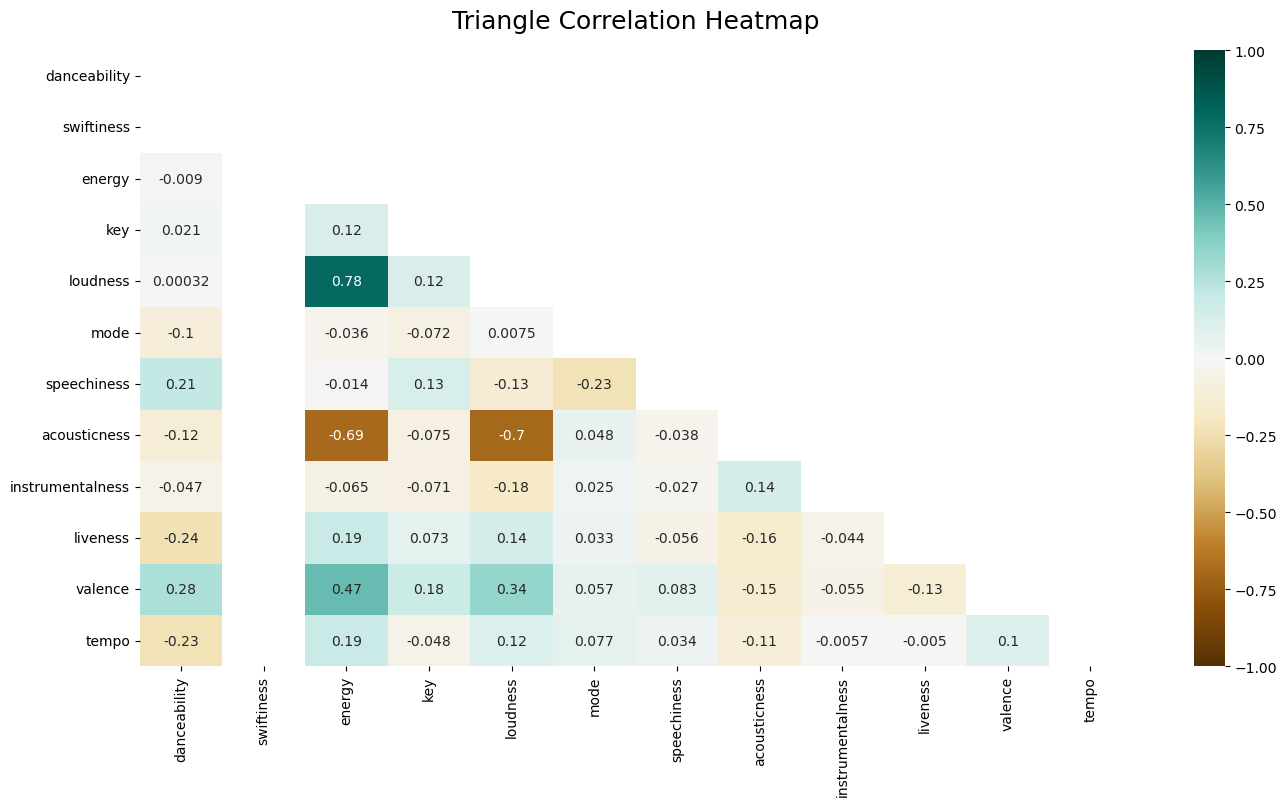

In [86]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

USING SELECT K-BEST TO PICK THE FEATURES MOST CORRELATED WITH DANCEABILITY

In [87]:
from sklearn.feature_selection import SelectKBest, f_regression

# score the different features and record it

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(xTrain, yTrain)

fs.scores_

/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.        ,  0.8541204 ,  0.32910846,  0.02077808,  4.13125027,
       11.7545613 ,  3.38716396,  0.82614325,  6.25211571,  7.20038016,
        6.57435953])

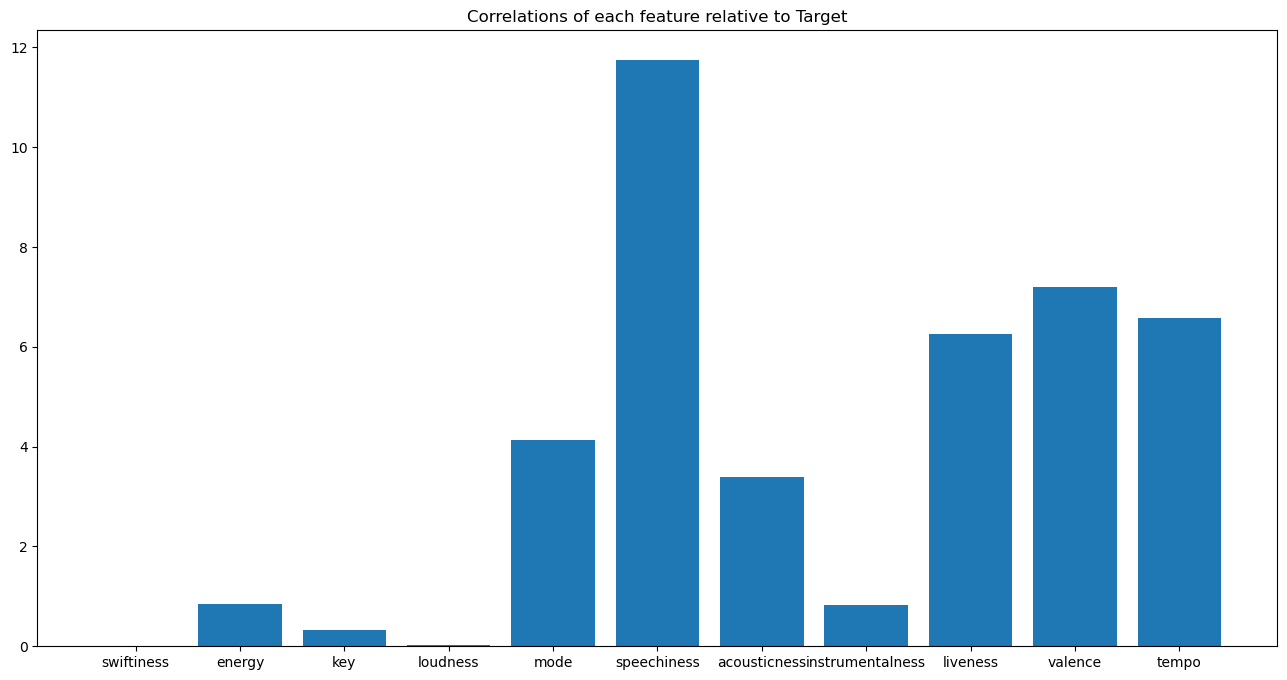

In [88]:
# plot the scores in a bar chart
plt.figure(figsize=(16, 8))
plt.bar([xTrain.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.title("Correlations of each feature relative to Target")
plt.show()

In [89]:
# f_regression is Pearson Correlation
from sklearn.feature_selection import SelectKBest, f_regression

# score the different features and record it

fs = SelectKBest(score_func=f_regression, k=6)
fs.fit(xTrain, yTrain)
# Get columns to keep and create new dataframe with those only
indices = fs.get_support(indices=True)
xTrain = xTrain.iloc[:,indices]
xTest = xTest.iloc[:,indices]

xTrain.head()

/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mode,speechiness,acousticness,liveness,valence,tempo
29,-3.122499,0.629553,-0.986836,0.078596,1.476087,0.742497
124,0.320256,-0.402877,0.670810,-0.476711,0.118163,-1.172752
115,0.320256,-0.592938,1.319321,-0.341146,1.365236,0.472098
84,0.320256,-0.114266,0.118376,-0.000815,-0.181135,2.082893
5,0.320256,0.455917,-0.953167,1.031524,2.872810,1.225426


Now lets do some predictions!

USING VARIANCE THRESHOLD FOR FEATURE SELECTION

In [90]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.1)
selector.fit_transform(xTrain)

selector.get_support()

array([ True,  True,  True,  True,  True,  True])

In [91]:
# lets remove the columns that did not pass the variance threshold test

columnsToRemove = []
for col in xTrain.columns:
    if col not in xTrain.columns[selector.get_support()]:
        columnsToRemove.append(col)

xTrain = xTrain.drop(columnsToRemove, axis=1)
xTest = xTest.drop(columnsToRemove, axis=1)

xTrain.head()

,mode,speechiness,acousticness,liveness,valence,tempo
29,-3.122499,0.629553,-0.986836,0.078596,1.476087,0.742497
124,0.320256,-0.402877,0.670810,-0.476711,0.118163,-1.172752
115,0.320256,-0.592938,1.319321,-0.341146,1.365236,0.472098
84,0.320256,-0.114266,0.118376,-0.000815,-0.181135,2.082893
5,0.320256,0.455917,-0.953167,1.031524,2.872810,1.225426


R squared values of models

Before feature selection (all features)
- linear regression: 0.10
- svm: 0.44
- tree: 0.31
- neural network: 0.42

After feature selection
- linear regression:0.19
- svm: 0.39
- tree: -0.09
- neural network: 0.41

In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))

0.1913287619632139
0.7063057577547915


In [93]:
from sklearn import svm

svmModel = svm.SVR().fit(xTrain, yTrain)

preds = svmModel.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))

0.38868508473331276
0.6546533432016325


/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
# bias check for svm
preds = svmModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))

0.5112068721486308
0.49819102542524824


In [95]:
from sklearn import tree

dtModel = tree.DecisionTreeRegressor().fit(xTrain, yTrain)

preds = dtModel.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))

-0.09092703187160778
0.7706605583886833


In [96]:
# bias check for tree
preds = dtModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))

1.0
0.0


In [97]:
from sklearn.neural_network import MLPRegressor

nnModel = MLPRegressor().fit(xTrain, yTrain)

preds = nnModel.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))

/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4142770206299684
0.636132519227844


/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [98]:
# bias check for nn
preds = nnModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))

0.5626224805983666
0.5141718960992603
